# 🧪 Exercise 6 and 7:

This notebook explores core probability and probability distributions concepts using the CICIDS2017 dataset. We will treat the network monitoring process as an experiment and define various events, compute probabilities, conditional probabilities, and use Bayes' Theorem to evaluate risk.

The file Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv is one of the labeled flow-level traffic logs from the CICIDS2017 dataset. It was generated by the Canadian Institute for Cybersecurity as part of their Intrusion Detection System (IDS) benchmarking project. Here's a structured description of the dataset:

🔢 Size: 225,745 rows × 79 columns (≈77.12 MB)
📅 Scenario Date: Friday Afternoon
📌 Attack Type Simulated: DDoS (Distributed Denial of Service)
🧪 Data Source: CICFlowMeter from raw PCAPs

Each row represents a single network flow — that is, a unidirectional sequence of packets between two IP/Port pairs over a transport-layer protocol within a timeout window.

| Category                 | Examples (Columns)                                                     | Description                                     |
| ------------------------ | ---------------------------------------------------------------------- | ----------------------------------------------- |
| 🧭 Flow Identifiers      | `Destination Port`, `Flow Duration`, `Label`                           | Flow metadata and attack labeling               |
| 📦 Packet Statistics     | `Total Fwd Packets`, `Total Backward Packets`, `Fwd Packet Length Max` | Counts and lengths of packets in each direction |
| ⏱ Inter-arrival Times    | `Flow IAT Mean`, `Fwd IAT Total`, `Bwd IAT Max`                        | Time between packets (IAT = Inter-Arrival Time) |
| 🚩 TCP Flags             | `SYN Flag Count`, `ACK Flag Count`, `FIN Flag Count`                   | Transport-level signal flags                    |
| 📈 Flow Rates            | `Flow Bytes/s`, `Flow Packets/s`, `Fwd Packets/s`                      | Throughput and packet rate                      |
| 🧮 Header/Segment Stats  | `Fwd Header Length`, `Avg Fwd Segment Size`, `Init_Win_bytes_forward`  | TCP/IP header info                              |
| 🧪 Statistical Features  | `Packet Length Mean`, `Packet Length Std`, `Idle Mean`, `Active Min`   | Derived statistics of activity and idle periods |
| 🏷 Labels (Ground Truth) | `Label`                                                                | BENIGN or DDoS attack flow                      |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load dataset
file_path = "./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df = pd.read_csv(file_path)

In [3]:
# Show a sample
print("Sample data:")
df.head(20)

Sample data:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
# Quick clean-up of column names
df.columns = df.columns.str.strip()

<Axes: >

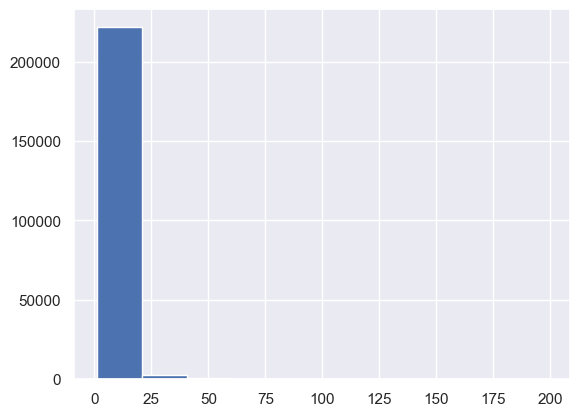

In [5]:
df[df["Total Fwd Packets"] <200]["Total Fwd Packets"].hist()

### Section 1 (basic probability):

#### ✅ Task for students:
Briefly define what an experiment and event mean in this network monitoring context.

In [6]:
Your_Answer = (
    "An experiment is observing a single network flow (a row in the dataset). "
    "An event is a specific outcome, e.g., 'flow is an attack' or 'port = 80' or Flow Duration exceeds 1 second...etc"
)

#### ✅ Task for students:
What is sample space? what is the size of main events?

In [7]:
# Sample Space and Events
sample_space_size = len(df)

num_attacks = df[df['Label'] != 'BENIGN'].shape[0]

num_benign = df[df['Label'] == 'BENIGN'].shape[0]

print(f"Sample size: {sample_space_size}")

print(f"Possible Events are attacks: {num_attacks} and Benign {num_benign}")

Sample size: 225745
Possible Events are attacks: 128027 and Benign 97718


#### ✅ Task for students:
Estimate the probability of attack and the probability of getting a benign traffic upon a check|

In [8]:
p_attack = num_attacks / sample_space_size

p_benign = num_benign / sample_space_size

print(f"P(Attack) = {p_attack:.4f}")
print(f"P(Benign) = {p_benign:.4f}")

P(Attack) = 0.5671
P(Benign) = 0.4329


#### ✅ Task for students:
Based on the sample estimate conditional Probability P(Attack | Destination Port = 80)

In [9]:
# P(Attack | Destination Port = 80)
port80_traffic = df[df['Destination Port'] == 80]

p_attack_given_port80 = (port80_traffic['Label'] != 'BENIGN').mean()

print(f"P(Attack | Destination Port = 80): {p_attack_given_port80:.4f}")

P(Attack | Destination Port = 80): 0.9348


#### ✅ Task for students:
Calculate P(Destination Port = 80 | Attack)

In [10]:
# Using the dataframe
attacks = df[df['Label'] != 'BENIGN']

p_port_80_given_attack = (attacks['Destination Port'] == 80).mean()

print(f"P(Destination Port = 80 | Attack) = {p_port_80_given_attack}")

P(Destination Port = 80 | Attack) = 0.999976567442805


In [11]:
# Using Bayes’ Theorem
joint_count_attack_and_port80 = df[(df['Label'] != 'BENIGN') & (df['Destination Port'] == 80)].shape[0]
p_attack_and_port80 = joint_count_attack_and_port80/ len(df)

p_port80_given_Attack = p_attack_and_port80 / p_attack if p_attack else 0


print(f"Using Bayes' Theorem: P(Port 80 | attack) = {p_port80_given_Attack:.5f}")

Using Bayes' Theorem: P(Port 80 | attack) = 0.99998


#### 👉 Conclusion: 
If a flow is headed to port 80, there’s a ~93.5% chance it’s an attack in this dataset — very high because this file contains mostly DDoS traffic aimed at port 80.

#### ✅ Task for students:
Choose 'Flow Duration'>1,000,000 μs and formulate a Bayes theorem-based question. i.e. compute P(Attack∣Long Duration) 

In [12]:
# Define long duration threshold (in microseconds)
duration_threshold = 1_000_000

# P(Long Duration)
p_long_duration = (df['Flow Duration'] > duration_threshold).mean()

# P(Long Duration | Attack)
attacks = df[df['Label'] != 'BENIGN']
p_long_duration_given_attack = (attacks['Flow Duration'] > duration_threshold).mean()

# Apply Bayes' Theorem
p_attack_given_long_duration = (p_long_duration_given_attack * p_attack) / p_long_duration if p_long_duration else 0

print(f"P(Long Duration)={p_long_duration}")
print(f"P(Long Duration | Attack)= {p_long_duration_given_attack}")
print(f"P(Attack | Long Duration)= {p_attack_given_long_duration}")

P(Long Duration)=0.5570045848191544
P(Long Duration | Attack)= 0.6613995485327314
P(Attack | Long Duration)= 0.6734239428666863


#### 👉 Conclusion:
If you observe a long-duration flow, there is a ~67% chance that it is an attack — higher than the base rate of 56.7%.

### Section 2 (binomial distribution):

#### ✅ Task for students:
- Suppose you want to simulate attack or benign events out of 10 random flows.
-  can we assume this is a bionomial experiment and why?
- Estimate the attack rate p from the dataset and model it as a binomial distribution to find probability of getting exactly 7 attacks in our simulation?
- When can we use a normal distribution to approximate such a binomial experiment?

In [13]:
from scipy import stats

attack_prob = (df['Label'] != 'BENIGN').mean()
print(f"Estimated attack probability (p): {attack_prob:.4f}")


n_trials = 10
k_success = 7


binom_prob = stats.binom.pmf(k_success, n_trials, attack_prob) # note: to get the documentation u may need to print help(stats.binom); the parent class
print(f"P(getting exactly 7 attacks out of 10) = {binom_prob:.4f}")

Estimated attack probability (p): 0.5671
P(getting exactly 7 attacks out of 10) = 0.1837




👉 **Can we assume this is a binomial experiment and why?**

✔ Yes, we can model it as a binomial experiment.

**Why?** Because it satisfies all the binomial conditions:

* There are a fixed number of trials (n = 10 flows).
* Each trial has only two possible outcomes: "Attack" or "Benign".
* The probability of attack (p) is assumed constant across trials.
* Trials are independent (assuming random sampling).

So this is a classic binomial setup.

---

👉  When can we use a normal distribution to approximate such a binomial experiment?

We can use the **normal approximation to the binomial** when:

$$
n \cdot p \geq 10 \quad \text{and} \quad n \cdot (1-p) \geq 10
$$

✅ In this case, if you increase n (say, to 100), and both np and n(1-p) are ≥ 10, then the binomial distribution becomes approximately normal:

$$
X \sim \mathcal{N}(\mu = np, , \sigma = \sqrt{np(1-p)})
$$

This makes calculations easier for large simulations.

### Section 3 (normal distribution):

#### ✅ Task for students:
- Choose a numerical feature 'Total Fwd Packets' and fit a normal distribution using MLE (Maximum Likelihood Estimation) using scipy stats model.
- Plot the histogram and overlay the fitted normal PDF. Does it match well?
- Does the normal curve align well with the histogram?
- Compare visually – are the tails and center well captured?
- Why might the fit not be perfect for real-world network data?
- Explain the shape of the data to your AI assistant and ask it to find a more suited distribution that can be used for the modeling.

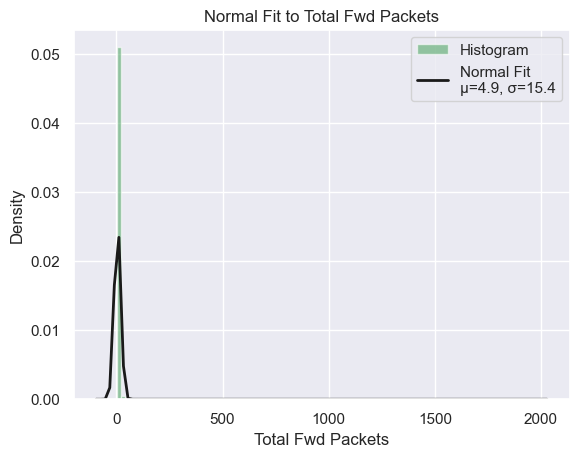

In [24]:
feature = 'Total Fwd Packets'

# Convert to numeric, coerce errors (e.g. "Infinity" → NaN), drop NaNs and infs
data = pd.to_numeric(df[feature], errors='coerce')
data = data[np.isfinite(data)]  # remove NaN, inf, -inf



# Fit a normal distribution to the data using MLE (more general than just mean/std)
mu, std = stats.norm.fit(data)


# Plot histogram and PDF
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f"Normal Fit\nμ={mu:.1f}, σ={std:.1f}")
plt.title(f"Normal Fit to {feature}")
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

👉 Does the normal curve align well with the histogram?

❌ Not perfectly.
While the fitted normal curve may roughly align with the center of the histogram, it often misses the shape of the tails and over- or underestimates the peak. The mismatch is especially noticeable in skewed or heavy-tailed data.

---
👉   Are the tails and center well captured?

* ✅ The center (peak) may be partially captured, especially if the data is unimodal.
* ❌ The tails are often poorly modeled — normal distributions assume symmetric, light tails, while real data often has skewness or extreme values.
* In the histogram, we see longer right tails or sharper peaks that the normal curve smooths out.

---

👉  Why might the fit not be perfect for real-world network data?

Because network traffic features (like flow size, duration, packet rate) tend to be:

* 📈 Right-skewed (due to large rare flows)
* ⚠️ Heavy-tailed (some flows are orders of magnitude larger)
* 🔄 Multi-modal (due to different protocols or traffic types)

These properties violate the assumptions of normality (symmetry and light tails), so the normal distribution can only offer a rough approximation — not a perfect model.

---

👉   Explain the shape of the data to your AI assistant and ask it to find a more suited distribution that can be used for the modeling:

The log-normal distribution is better choice to fit the skewed, heavy-tailed shape much better than the normal .

The normal fit underestimates the peak and overestimates the tails.

#### ✅ Task for students:
- Choose a numerical feature 'Flow Duration' and plot its distribution.
- Comment on the shape (normal, skewed, multimodal?)
- Compute the skewness and the kurtosis.

In [ ]:
feature = 'Flow Duration'
sns.histplot(df[feature], bins=100, kde=True)
plt.title(f"Distribution of {feature}")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.xlim(0, df[feature].quantile(0.99))
plt.show()

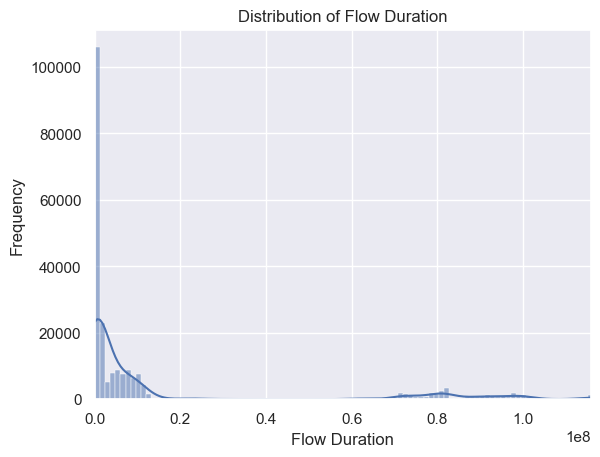

Skewness of Flow Duration: 1.94
Kurtosis of Flow Duration: 2.12


In [ ]:
print(f"Skewness of {feature}: {df[feature].skew():.2f}")
print(f"Kurtosis of {feature}: {df[feature].kurtosis():.2f}")

#### Interpretation:
Flow Duration is highly right-skewed (positive skew).

Most flows are short, but some last a very long time (heavy tail).

Skewness > 0 → long tail to the right.

Kurtosis > 0 → more peaked and heavy-tailed than normal.

### Section 4 (outliers):

#### ✅ Task for students:
Use IQR method to detect and count outliers in 'Flow Duration'.

Take a look on the Benig and Atrtack traffic when flow duration has an extreme value

In [108]:
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]


print(f"Total outliers in {feature}: {len(outliers)}")
print("Outliers by label:")
print(outliers['Label'].value_counts())

Total outliers in Flow Duration: 37465
Outliers by label:
Label
DDoS      21915
BENIGN    15550
Name: count, dtype: int64


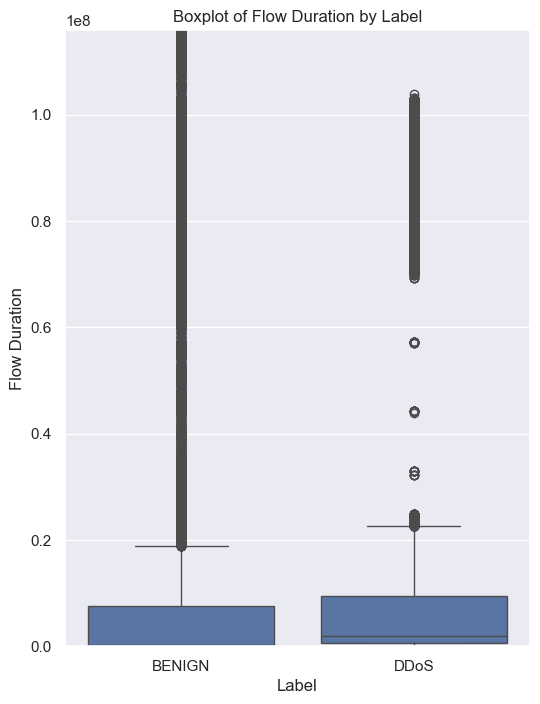

In [109]:
# Boxplot for visual confirmation
plt.figure(figsize=(6, 8))
sns.boxplot(x='Label', y=feature, data=df, showfliers=True)
plt.title("Boxplot of Flow Duration by Label")
plt.ylim(0, df[feature].quantile(0.99))
plt.show()

### Section 5 (CLT):

#### ✅ Task for students:
- In the following code, we sample different sample sizes and compute mean/std. 

- Do you expect the mean and the std. to change for each sample size? why do you think this is happening?

- What happens if you increase sample size?

In [110]:
sample_sizes = [10, 20, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000, 20000, 30000]
means = []
stds = []
column = 'Flow Bytes/s'

for size in sample_sizes:
    sample = df[column].dropna().sample(size, random_state=42)
    means.append(sample.mean())
    stds.append(sample.std())

In [111]:
df[column].dropna().mean()

np.float64(inf)

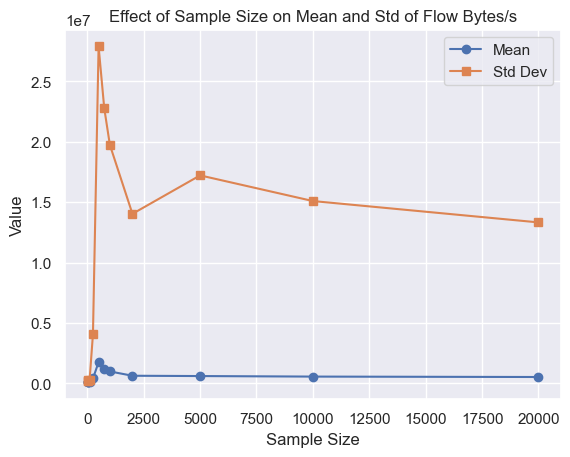

In [112]:
# Plot the trend
plt.plot(sample_sizes, means, marker='o', label='Mean')
plt.plot(sample_sizes, stds, marker='s', label='Std Dev')
plt.title("Effect of Sample Size on Mean and Std of Flow Bytes/s")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation:

✅ What you should observe:
As sample size increases:
- Mean stabilizes and fluctuates less.

- Standard deviation also stabilizes.

- Small samples are more sensitive to extreme values.

✅ Why it matters:

- Larger samples give more reliable estimates of the population mean and std.

- Statistical summaries from small samples may be misleading.

- This is foundational for statistical confidence and inference

#### ✅ Task for students:
In the followingf code we take repeated samples (1000 repeats), first with sample size of 10, 50, 500 and 1000  and plot the distribution of sample means.
- How does the shape of the sampling distribution change as n increases?

- Why is the distribution for n = 10 much more variable and irregular than the one for n = 500?

- Which sample size looks closest to a normal distribution? Explain why.

- Compare the distribution of Flow duration vs. the different distributions of different sample means

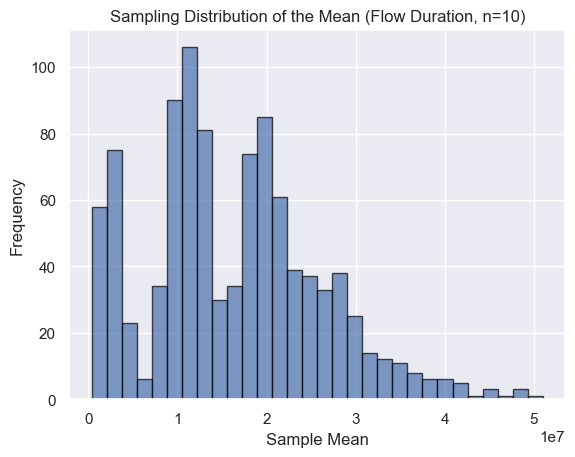

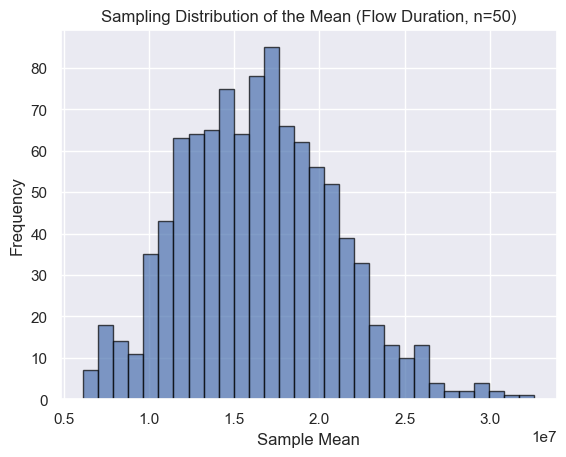

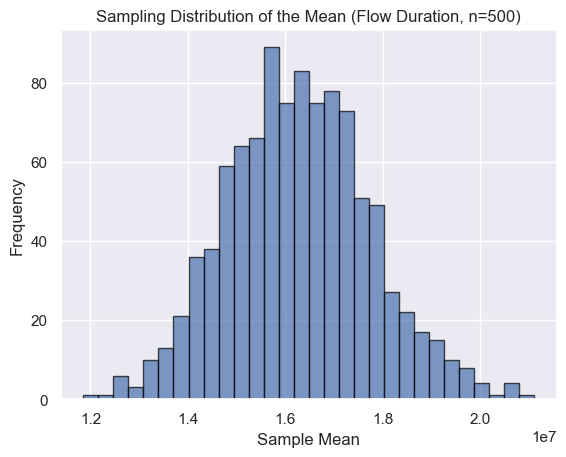

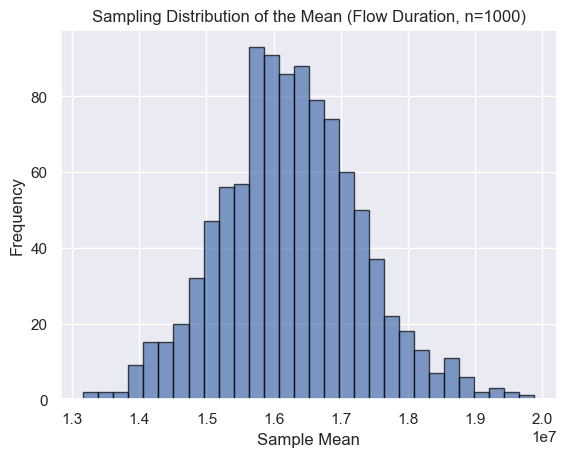

In [120]:

sample_sizes = [10, 50, 500, 1000]
column = 'Flow Duration'
data = df[column].dropna()

for sample_size in sample_sizes:
    sample_means = []
    for _ in range(1000):
        sample = data.sample(sample_size, replace=True)
        sample_means.append(sample.mean())
    
    print(f"Mean of sample means: {np.mean(sample_means):.2f}")
    print(f"Std of sample means: {np.std(sample_means):.2f}")
    
    plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Sampling Distribution of the Mean (Flow Duration, n={sample_size})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

#### Interpretation:
👉 What you should observe:

Even though Flow Duration is skewed, the distribution of sample means is approximately normal.

We can even assume that Mean of sample means ≈ population mean.

However, Std of sample means < std of population (by √n rule).

n = 10 → more variation, less bell-shaped

n = 500 → tightly clustered, nearly normal

👉 Why it matters:

The Central Limit Theory explains why many statistical procedures assume normality.

It enables confidence intervals and hypothesis tests even when the underlying data is not normal.

It's the backbone of inferential statistics.


👉 How does the shape of the sampling distribution change as n increases?

It becomes smoother, more symmetric, and closer to a normal (bell) curve.

---

👉 Why is the distribution for n = 10 more irregular than n = 500?

Smaller samples are more affected by randomness and outliers; larger samples average these out.

---

👉 Which sample size looks most normal? Why?

n = 500 — large samples make the mean distribution approximate normal due to the CLT.

---

👉 Compare std of sample means vs. population std

The std of sample means is smaller and follows:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

---

👉 Compare Flow Duration vs. sample means distributions

Flow Duration is skewed and wide; sample means are more centered, symmetric, and narrower as n increases.


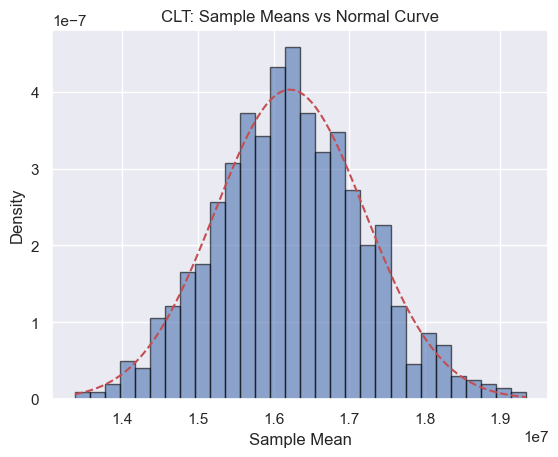

In [119]:
# ✅ Task for students:
# overlay the sampling distribution of means (when n=50) with normal distribution

sample_means = []
sample_sizes = 50
column = 'Flow Duration'
data = df[column].dropna()

for _ in range(1000):
    sample = data.sample(sample_size, replace=True)
    sample_means.append(sample.mean())

        

from scipy.stats import norm


mu = np.mean(sample_means)
sigma = np.std(sample_means)
x_vals = np.linspace(min(sample_means), max(sample_means), 100)
plt.hist(sample_means, bins=30, density=True, alpha=0.6, edgecolor='black')
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r--')
plt.title("CLT: Sample Means vs Normal Curve")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()